<a href="https://colab.research.google.com/github/Kim-Min-Gyeong/study-mldl/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from tensorflow import keras
keras.layers.Conv2D(10, kernel_size=(3,3), activation='relu', padding='same', strides=1) #2차원 입력을 처리하는 합성곱 층, 뉴런 개수 10개, 커널 크기 3 * 3, 활성화 함수는 relu, same padding 적용, 1칸씩 이동


In [ ]:
keras.layers.Maxpooling2D(2, strides=2, padding='valid') #풀링 크기 지정

데이터 가져오기

In [5]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0 #흑백 이미지의 경우 채널 차원이 없는 2차원 배열. Conv2D를 사용하려고 마지막에 이 채널 차원을 추가
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)


4422102/4422102 [==============================] - 0s 0us/step


합성곱 신경망 생성

In [8]:
model = keras.Sequential()

#첫 합성곱-풀링 층
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28, 28, 1))) #합성곱 층 추가

model.add(keras.layers.MaxPooling2D(2)) #풀링층

#합성곱 층에서 32개의 필터를 사용해서, 이 특성 맵의 깊이는 32

#따라서 최대 풀링을 통과한 특성 맵의 크기는 (14, 14, 32)

#두 번째 합성곱-풀링 층
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same')) #합성곱 층 추가

model.add(keras.layers.MaxPooling2D(2)) #풀링층

In [13]:
model.add(keras.layers.Flatten()) #(7, 7, 64) 크기의 특성 맵을 1차원으로 펼치기
model.add(keras.layers.Dense(100, activation='relu')) #Dense 은닉층, 100개의 뉴런
model.add(keras.layers.Dropout(0.4)) #은닉층의 과대적합 방지
model.add(keras.layers.Dense(10, activation='softmax')) #dense 출력층, 10개의 뉴런을 가진 출력층. 확률 계산

In [14]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)              

최종 특성 맵의 크기는 (7, 7, 64)

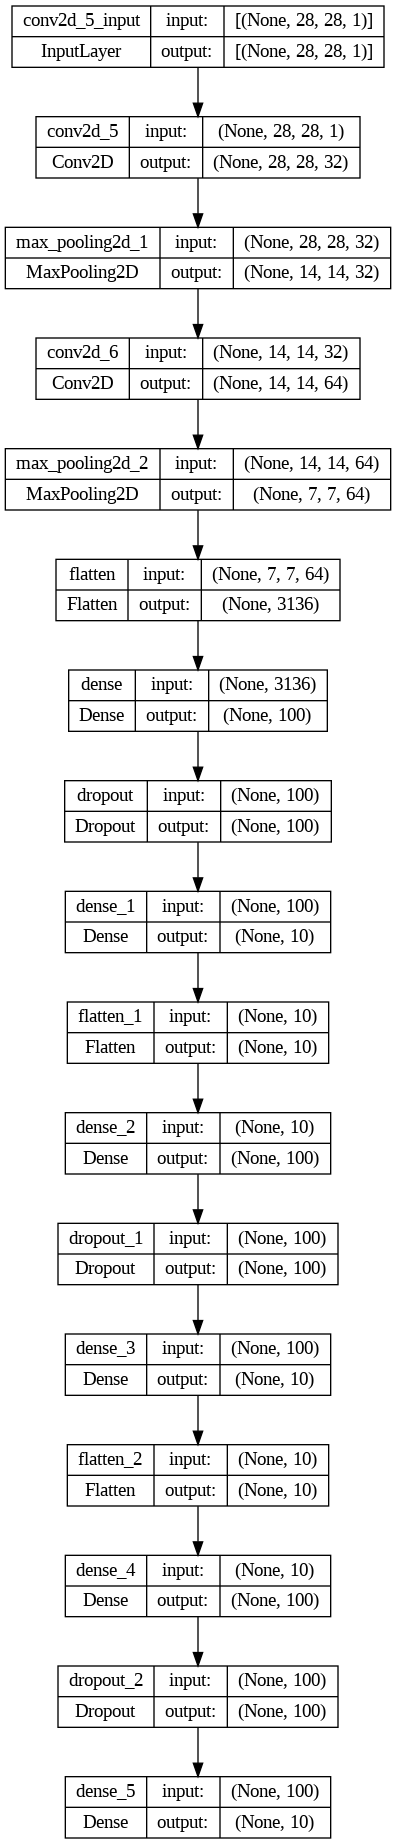

In [16]:
keras.utils.plot_model(model, show_shapes=True)

지금까지 한 것!

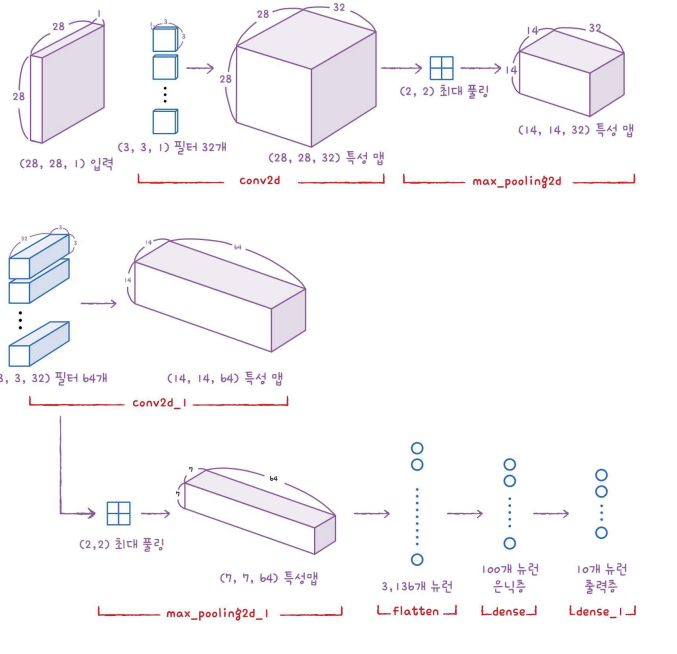

In [17]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, validation_data = (val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])


Epoch 1/20
1500/1500 [==============================] - ETA: 0s - loss: 1.5559 - accuracy: 0.2926

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 116s 76ms/step - loss: 1.5559 - accuracy: 0.2926 - val_loss: 1.1651 - val_accuracy: 0.4526
Epoch 2/20
1500/1500 [==============================] - 75s 50ms/step - loss: 1.0329 - accuracy: 0.5027 - val_loss: 0.8847 - val_accuracy: 0.5575
Epoch 3/20
1500/1500 [==============================] - 102s 68ms/step - loss: 0.7891 - accuracy: 0.6492 - val_loss: 0.6465 - val_accuracy: 0.7204
Epoch 4/20
1500/1500 [==============================] - 100s 67ms/step - loss: 0.5832 - accuracy: 0.7860 - val_loss: 0.4419 - val_accuracy: 0.8517
Epoch 5/20
1500/1500 [==============================] - 103s 69ms/step - loss: 0.4681 - accuracy: 0.8505 - val_loss: 0.3943 - val_accuracy: 0.8720
Epoch 6/20
1500/1500 [==============================] - 102s 68ms/step - loss: 0.4119 - accuracy: 0.8708 - val_loss: 0.3503 - val_accuracy: 0.8860
Epoch 7/20
1500/1500 [==============================] - 115s 77ms/step - loss: 0.3824 - accuracy: 0.8810 - val_loss: 0.3461 - val_

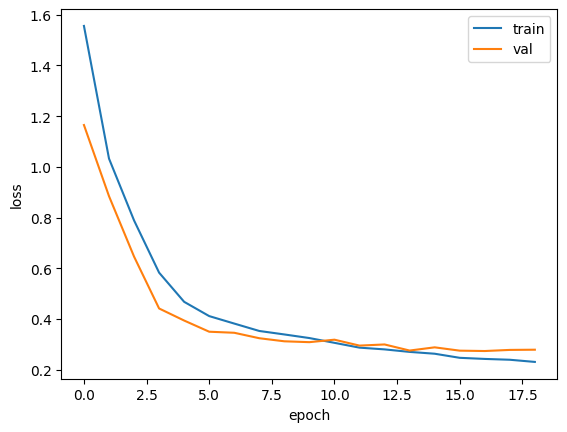

In [18]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [19]:
#성능 평가
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 5s 15ms/step - loss: 0.2742 - accuracy: 0.9153


[0.2741530239582062, 0.9152500033378601]

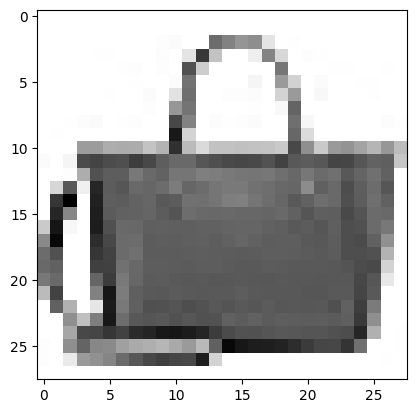

1/1 [==============================] - 0s 214ms/step
[[2.1638766e-04 2.0073215e-10 1.6439456e-06 5.0286383e-07 1.5339901e-07
  3.1992968e-09 6.4504806e-05 8.2018423e-06 9.9970859e-01 3.6477175e-12]]


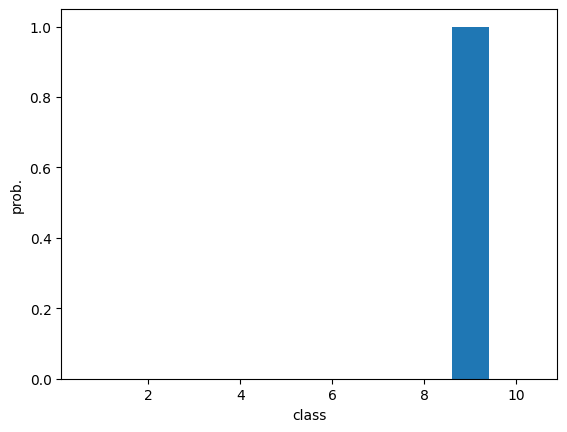

In [20]:
#훈련된 모델을 사용하여 새로운 데이터에 대해 예측
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

#예측 및 출력
preds = model.predict(val_scaled[0:1])
print(preds)

#막대 그래프 그림
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

**가방으로 예측**

In [21]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

In [22]:
import numpy as np
print(classes[np.argmax(preds)]) #preds 배열에서 가장 큰 인덱스를 찾아 classes의 인덱스로 사용

가방


In [23]:
#테스트 세트로 합성곱 신경망의 일반화 성능을 가늠
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

model.evaluate(test_scaled, test_target)

313/313 [==============================] - 5s 14ms/step - loss: 0.2943 - accuracy: 0.9112


[0.2943405508995056, 0.9111999869346619]